In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import imutils
import pytesseract

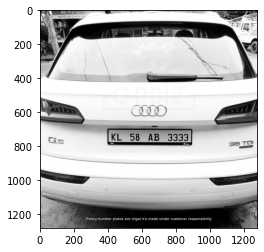

In [2]:
#reading image
img = cv2.imread('i2.jpg')
#performing grayscaling
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

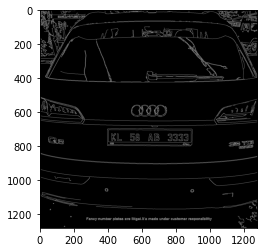

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
#finding contours
keypts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(keypts)
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in conts:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[395, 700]],

       [[402, 790]],

       [[892, 789]],

       [[890, 698]]], dtype=int32)

In [6]:
#masking
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0,255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

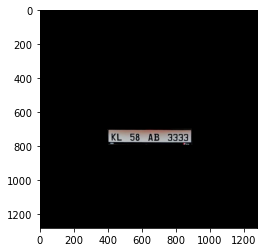

In [7]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [8]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

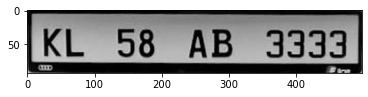

In [9]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
# Run tesseract OCR on image
text = pytesseract.image_to_string(cropped_img, lang= 'eng')
text

'KL_58_ AB 3333\n\x0c'

In [11]:
result= " "
for a in text:
    if (a.isdigit() or a.isalpha()):
        result+= a;
result

' KL58AB3333'

In [12]:
#extracting owner's details
df= pd.read_excel( r'C:\mp\owner.xlsx')
num= str(result)
df[df['Plate No.'] == num]

,Plate No.,Owner's Name,Owner's Address,Owner's Contact No.,Registered Vehicle
1,KL58AB3333,Kartik Sharma,"H.no. 23, Block-B, Shastri Park",7895632412,Yes
